# Projeto 2 - Ciência dos Dados

Integrantes: 

- Anderson Franco Júnior
- Luiz Miguel Moraes Berredo
- Samuel Jabes Costa Cavalcanti
- Vinícius Rodrigues de Freitas

<div id="indice"></div>

## Índice

- [Visão Geral;](#visao_geral)
- [Análise exploratória;](#analise_explor)





##### Carregando algumas bibliotecas

In [1]:
%matplotlib inline
# A linha acima é necessária para visualizar os gráficos no jupyter notebook

import os
import pandas as pd
# Módulo com funções matemáticas para arrays multidimensionais (matrizes)
import numpy as np
# Módulo com funções de geração de gráficos
import matplotlib.pyplot as plt
# Módulo com funções de cunho estatístico
from scipy import stats
import seaborn as sns

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\samue\OneDrive\Documentos\Insper\2º Semestre\Ciência dos Dados\Projeto 2\23-1a-cd-p2-anderson_samuel_vinicius


**Carregando as bases de dados**

<div id='visao_geral'></div>

# Visão Geral

<img src="https://www.social.go.gov.br/images/2022/cadunico.png" alt="">

##### Objetivo
- Com a base de dados obtida acerca de conhecimentos e práticas financeiras de pessoas cadastradas no CADÚnico, o projeto que apresentaremos tem como objetivo principal aplicar modelos de classificação para compreender e analisar `os fatores que influenciam no endividamento de pessoas cadastradas no CADUnico`, sendo este o tema central deste projeto. O CADUnico (Cadastro Único para Programas Sociais do Governo Federal) é um instrumento que reúne informações socioeconômicas das famílias de baixa renda no Brasil, sendo utilizado como base para a seleção e implementação de políticas públicas.

##### Motivação
- O endividamento é uma questão preocupante e desafiadora que afeta muitas pessoas em diferentes contextos socioeconômicos. No caso específico das famílias cadastradas no CADUnico, é fundamental compreender os fatores que contribuem para esse endividamento, a fim de desenvolver estratégias eficazes para lidar com essa situação.

- Ao entender os fatores que influenciam o endividamento, é possível identificar padrões, correlações e variáveis relevantes que contribuem para o problema.

# Limpando a base de dados

**Lendo a base de dados a visualizando seu conteúdo**

Primeiramente vamos abrir a base de dados e entender as características desta.

In [2]:
responsaveis_df = pd.read_csv('Data/Base_Responsaveis.csv', encoding='latin1', sep=';')
responsaveis_df.head(5)

,ID_DOM,CodIBGE7,CodUF,R01,R02D,R02M,R02A,R03,R04,R05,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1101476,11,2,4,2,1977,2,5,1,...,,,,2,2,2,2,2,1,2
1,2,1200385,12,2,6,7,1977,1,3,1,...,,,,2,2,2,2,2,1,1
2,3,2311801,23,2,22,9,1986,2,3,2,...,,,,2,2,2,2,2,1,1
3,4,2311801,23,2,14,9,1983,4,3,1,...,,,,2,2,2,2,2,2,
4,5,2311801,23,2,18,9,1976,2,2,2,...,,,,2,2,2,2,2,1,1


In [3]:
responsaveis_df.shape

(8827, 482)

In [4]:
nomes_colunas = [x.upper() for x in list(responsaveis_df.columns)]
responsaveis_df.columns = nomes_colunas
nomes_colunas

['ID_DOM',
 'CODIBGE7',
 'CODUF',
 'R01',
 'R02D',
 'R02M',
 'R02A',
 'R03',
 'R04',
 'R05',
 'R05A',
 'R06_01',
 'R07_01',
 'R08_01',
 'R09_01',
 'R06_02',
 'R07_02',
 'R08_02',
 'R09_02',
 'R06_03',
 'R07_03',
 'R08_03',
 'R09_03',
 'R10A',
 'R10B',
 'R11',
 'R12',
 'R17_01',
 'R17_02',
 'R17_03',
 'R17_04',
 'R17_05',
 'R17_06',
 'R17_07',
 'R17_08',
 'R17_09',
 'R18_01',
 'R18_02',
 'R18_03',
 'R19_01',
 'R20_01',
 'R19_02',
 'R20_02',
 'R19_03',
 'R20_03',
 'R19_04',
 'R20_04',
 'R19_05',
 'R20_05',
 'R19_06',
 'R20_06',
 'R19_07',
 'R20_07',
 'R19_08',
 'R20_08',
 'R19_09',
 'R20_09',
 'R19_10',
 'R20_10',
 'R19_11',
 'R20_11',
 'R19_12',
 'R20_12',
 'R19_13',
 'R20_13',
 'R19_14',
 'R20_14',
 'R19_15',
 'R20_15',
 'R19_16',
 'R20_16',
 'R19_17',
 'R20_17',
 'R19_18',
 'R20_18',
 'R19_98',
 'R20_98',
 'R21',
 'R22',
 'R23_01',
 'R23_02',
 'R23_03',
 'R23_04',
 'R23_05',
 'R24',
 'R25',
 'R26_01',
 'R26_02',
 'R26_03',
 'R26_04',
 'R26_05',
 'R27_01',
 'R27_02',
 'R27_03',
 'R27_0

**Manipulando as colunas do DataFrame**

Algumas colunas são referentes à mesma pergunta do questionário, vamos criar um dicionário onde cada chave é referente a uma pergunta e seu valor é uma lista de colunas associadas à pergunta.

In [5]:
col_per_quest = {}
for i in range(len(nomes_colunas)):
    in_car = nomes_colunas[i][0:3]
    if(in_car not in col_per_quest.keys()):
        col_per_quest[in_car] = [nomes_colunas[i]]
    else:
        col_per_quest[in_car].append(nomes_colunas[i])
col_per_quest

{'ID_': ['ID_DOM'],
 'COD': ['CODIBGE7', 'CODUF'],
 'R01': ['R01'],
 'R02': ['R02D', 'R02M', 'R02A'],
 'R03': ['R03'],
 'R04': ['R04'],
 'R05': ['R05', 'R05A'],
 'R06': ['R06_01', 'R06_02', 'R06_03'],
 'R07': ['R07_01', 'R07_02', 'R07_03'],
 'R08': ['R08_01', 'R08_02', 'R08_03'],
 'R09': ['R09_01', 'R09_02', 'R09_03'],
 'R10': ['R10A', 'R10B'],
 'R11': ['R11'],
 'R12': ['R12'],
 'R17': ['R17_01',
  'R17_02',
  'R17_03',
  'R17_04',
  'R17_05',
  'R17_06',
  'R17_07',
  'R17_08',
  'R17_09'],
 'R18': ['R18_01', 'R18_02', 'R18_03'],
 'R19': ['R19_01',
  'R19_02',
  'R19_03',
  'R19_04',
  'R19_05',
  'R19_06',
  'R19_07',
  'R19_08',
  'R19_09',
  'R19_10',
  'R19_11',
  'R19_12',
  'R19_13',
  'R19_14',
  'R19_15',
  'R19_16',
  'R19_17',
  'R19_18',
  'R19_98'],
 'R20': ['R20_01',
  'R20_02',
  'R20_03',
  'R20_04',
  'R20_05',
  'R20_06',
  'R20_07',
  'R20_08',
  'R20_09',
  'R20_10',
  'R20_11',
  'R20_12',
  'R20_13',
  'R20_14',
  'R20_15',
  'R20_16',
  'R20_17',
  'R20_18',
  'R

**Separando os dataframes e os tratando**

Antes de tratarmos de colunas referentes a uma mesma pergunta, para podermos partir para o desenvolvimento dos modelos e aplicação das ferramentas estatísticas, faz-se necessário limpar a base dados uma vez que esta apresenta um certo grau de "caos", digamos assim, com uma quantidade considerável de colunas e muitos valores nulos em diversas variáveis. 

Logo, para começar, vamos:

`Informações demográficas`: separamos em um novo dataframe informações referentes ao indívíduo em si, como gênero, grau de escolaridade e data de nascimento, o que consideramos importantes para a análise. Felizmente, tal conjunto não apresenta anomalias, logo não será necessário filtrar coisa alguma.

_Apêndice_: embora não consideramos aqui as informações de localidade para as informações demográficas (o que consideramos relevante também), mais abaixo elas serão consideradas. Estamos fazendo isso apenas para não haver repetição de colunas no nosso dataframe final (em questão de tratamento). 

In [6]:
info_demografico = responsaveis_df.loc[:, ['ID_DOM', 'CODIBGE7', 'CODUF', 'R01', 'R02D', 'R02M', 'R02A', 'R03', 'R04']]
info_demografico.head(5)

,ID_DOM,CODIBGE7,CODUF,R01,R02D,R02M,R02A,R03,R04
0,1,1101476,11,2,4,2,1977,2,5
1,2,1200385,12,2,6,7,1977,1,3
2,3,2311801,23,2,22,9,1986,2,3
3,4,2311801,23,2,14,9,1983,4,3
4,5,2311801,23,2,18,9,1976,2,2


`Informações monetárias`: notamos que existem algumas variáveis que tratam sobre o recebimento e gasto de dinheiro de cada indivíduo, o que entendemos que é bastante relevante haja vista que essa abordagem permite uma compreensão mais precisa e detalhada dos hábitos financeiros das pessoas, além de identificar possíveis desequilíbrios entre renda e despesas.

In [7]:
info_money = responsaveis_df.loc[:, ['R10A', 'R10B', 'R20_01', 'R20_02', 'R20_03', 'R20_04', 'R20_05', 'R20_06', 'R20_07', 'R20_08', 'R20_09', 'R20_10', 'R20_11', 'R20_12', 'R20_13', 'R20_14', 'R20_15', 'R20_16', 'R20_17', 'R20_18', 'R20_98', 'R22', 'R25', 'R39', 'R82']]
info_money = info_money.astype(str)
info_money.head(5)

,R10A,R10B,R20_01,R20_02,R20_03,R20_04,R20_05,R20_06,R20_07,R20_08,...,R20_14,R20_15,R20_16,R20_17,R20_18,R20_98,R22,R25,R39,R82
0,545,"9999,97",92,,,,,,,,...,,,,,,,,,"9999,97",14
1,545,"9999,97",112,,,,,,,,...,,,,,,,,,"9999,97","9999,97"
2,,,102,,,,,,,,...,,,,,,,,,"9999,97","9999,97"
3,545,"9999,97",90,,,,,,,,...,,,,,,,,,"9999,97","9999,97"
4,,,134,,,,,,,,...,,,,,,,,,"9999,97",6


Note que, desta vez, possuímos uma vasta quantidade de valores nulos em diferentes colunas. Para não trabalharmos com valores do tipo, decidimos que é interessante substituí-los pelo valor 0, uma vez que estamos tratando de quantidade monetária, seja esta quantidade um recebimento ou um gasto.

In [8]:
for column in list(info_money):
    info_money.loc[[(not x.isnumeric()) for x in info_money[column]], column] = '0'

info_money.head(5)

,R10A,R10B,R20_01,R20_02,R20_03,R20_04,R20_05,R20_06,R20_07,R20_08,...,R20_14,R20_15,R20_16,R20_17,R20_18,R20_98,R22,R25,R39,R82
0,545,0,92,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,14
1,545,0,112,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,102,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,545,0,90,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,134,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


`Informações sobre tempo de deslocamento`: uma vez que o tempo pode ser considerada como uma variável quantitativa, mas com um conceito mais abstrato em quesito de ser algo palpável como quantidade, aqui separamos-a e entendemos que quando as pessoas dizem que não sabem ou não tem noção do tempo, ou até mesmo não responderam, decidimos que substituir por _0_ mostra-se mais viável, até mesmo em quesito de preenchimento.

In [9]:
info_time = responsaveis_df.loc[:, ['R37H', 'R37M', 'R38H', 'R38M']]
info_time = info_time.astype(str)

In [10]:
# Anulando as linhas 99 e 97 da pergunta 37
linhas_99_97_37 = info_time[(info_time['R37H'] == '99') | (info_time['R37H'] == '97') | (info_time['R37H'] == ' ')].index

info_time.loc[linhas_99_97_37, ['R37H','R37M']] = '0'

# Anulando as linhas 99 e 97 da pergunta 38
linhas_99_97_38 = info_time[(info_time['R38H'] == '99') | (info_time['R38H'] == '97') | (info_time['R38H'] == ' ')].index

info_time.loc[linhas_99_97_38, ['R38H','R38M']] = '0'

`Informações categóricas`: agora, por fim, o que nos sobra (em maioria) são as nossas variáveis qualitativas que se mostram mais necessitadas de uma limpeza mais adequada. De início, selecionamos todas as outras colunas que não foram selecionadas/tratadas antes.

In [11]:
nao_cat = ['R01', 'R02D', 'R02M', 'R02A', 'R03', 'R04', 'R10A', 'R10B', 'R20_01', 'R20_02', 'R20_03', 'R20_04', 'R20_05', 'R20_06', 'R20_07', 'R20_08', 'R20_09', 'R20_10', 'R20_11', 'R20_12', 'R20_13', 'R20_14', 'R20_15', 'R20_16', 'R20_17', 'R20_18', 'R20_98', 'R22', 'R25', 'R39', 'R82', 'R37H', 'R37M', 'R38H', 'R38M']
categoricas = []
for list_column in col_per_quest.values():
    for column in list_column:
        if column not in nao_cat:
            categoricas.append(column)
info_categoricas = responsaveis_df.loc[:, categoricas]
info_categoricas = info_categoricas.astype(str)

Agora, voltando a tratar dessas colunas que são referentes à mesma pergunta do questionário, temos que algumas correspondem a perguntas que possuem subdivisões - como itens - e que geram várias respostas. Numa leitura do questionário correspondente, identificamos as seguintes perguntas como tendo essas características:

- Pergunta 6
- Pergunta 7
- Pergunta 8
- Pergunta 9
- Pergunta 10
- Pergunta 17
- Pergunta 18
- Pergunta 19
- Pergunta 20
- Pergunta 30
- Pergunta 44
- Pergunta 54
- Pergunta 55
- Pergunta 76
- Pergunta 94

In [12]:
frag_quest = ['R06', 'R07', 'R08', 'R09', 'R10', 'R17', 'R18', 'R19', 'R20', 'R30', 'R44', 'R54', 'R55', 'R76', 'R94']
for column in categoricas:
    num_column = column[0:3]
    if num_column in frag_quest:
        info_categoricas.loc[[(not str(x).isnumeric()) for x in info_categoricas[column]], column] = '99'
        
info_categoricas.head(5)

,ID_DOM,CODIBGE7,CODUF,R05,R05A,R06_01,R06_02,R06_03,R07_01,R07_02,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1101476,11,1,1,4,99,99,5,99,...,,,,2,2,2,2,2,1,2
1,2,1200385,12,1,1,2,99,99,4,99,...,,,,2,2,2,2,2,1,1
2,3,2311801,23,2,,99,99,99,99,99,...,,,,2,2,2,2,2,1,1
3,4,2311801,23,1,1,1,99,99,1,99,...,,,,2,2,2,2,2,2,
4,5,2311801,23,2,,99,99,99,99,99,...,,,,2,2,2,2,2,1,1


As demais são referentes às respostas de uma mesma pergunta, ou seja, cada coluna é referente a uma possível resposta de uma mesma pergunta. Neste caso,  há vários valores vazios quando o respondente não assinalou aquela alternativa e o valor da resposta quando o respondente assinalou.

Como o nome da coluna já contém o número da resposta, vamos trocar os vazios por `0` e os valores de resposta por `1`.


In [13]:
for column in categoricas:
    num_column = column[0:3]
    if num_column not in frag_quest and len(col_per_quest[num_column])>1:
        info_categoricas.loc[[(str(x).isnumeric()) for x in info_categoricas[column]], column] = '1'
        info_categoricas.loc[[(not str(x).isnumeric()) for x in info_categoricas[column]], column] = '0'
        
info_categoricas.head(5)

,ID_DOM,CODIBGE7,CODUF,R05,R05A,R06_01,R06_02,R06_03,R07_01,R07_02,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1,1,1,1,4,99,99,5,99,...,0,0,0,2,2,2,2,2,1,2
1,2,1,1,1,1,2,99,99,4,99,...,0,0,0,2,2,2,2,2,1,1
2,3,1,1,1,0,99,99,99,99,99,...,0,0,0,2,2,2,2,2,1,1
3,4,1,1,1,1,1,99,99,1,99,...,0,0,0,2,2,2,2,2,2,
4,5,1,1,1,0,99,99,99,99,99,...,0,0,0,2,2,2,2,2,1,1


**Ainda tratando valores nulos**

Ainda há valores nulos em nosso DataFrame, em posições que podemos não conhecer e nem saber a razão pela qual o valor é nulo. Por esse motivo, vamos usar a função `value_counts` para visualizar quais colunas possuem valores nulos e então ver as perguntas associadas para saber como podemos tratá-las.

In [14]:
for column in list(info_categoricas.columns):
    if False in [str(x).isdigit() for x in list(info_categoricas[column])]:
        print(info_categoricas[column].value_counts())
        print("---------------------------------")

1     7649
       805
2      323
99      50
Name: R35, dtype: int64
---------------------------------
1     3544
5     1787
2      809
       717
99     567
8      555
6      427
4      178
3      103
9       40
7       39
11      31
12      25
10       5
Name: R36, dtype: int64
---------------------------------
2     5519
      2632
1      571
99     105
Name: R57, dtype: int64
---------------------------------
2     6755
      1180
1      765
99     127
Name: R59, dtype: int64
---------------------------------
2     6317
      1379
1      966
99     165
Name: R62, dtype: int64
---------------------------------
     7951
1     561
3     202
2     113
Name: R63, dtype: int64
---------------------------------
2     3274
1     2791
      2692
99      70
Name: R66, dtype: int64
---------------------------------
1    8213
      593
2      21
Name: R79, dtype: int64
---------------------------------
2     6852
1     1294
       614
99      67
Name: R83, dtype: int64
------------------------

A questão `98` pergunta "A entrevista do cônjugue foi realizada?" e é condicionada à pergunta `97` que diz "O responsável possui cônjugue morando no mesmo domicílio?". Como, para essa pergunta, não faz diferença técnica a entrevista não existir por o morador não ter um cônjugue ou a entrevista não ter sida realizada, substituiremos todos os valores por `2` que equivale à resposta "Não".

In [15]:
info_categoricas.loc[[(not x.isnumeric()) for x in info_categoricas['R98']], 'R98'] = '2'
info_categoricas['R98'].value_counts()

2    4810
1    4017
Name: R98, dtype: int64

Similarmente à questão 98, a questão `79` traz a pergunta "É o seu nome que está escrito no cartão do Bolsa Família?" condicionada à questão `78`. Novamente substituiremos pelo valor `2` por razões similares.

In [16]:
info_categoricas.loc[[(not x.isnumeric()) for x in info_categoricas['R79']], 'R79'] = '2'
info_categoricas['R79'].value_counts()

1    8213
2     614
Name: R79, dtype: int64

Para as demais perguntas, podemos substituir os valores vazios por `99` sem perda de informações.

In [17]:
preenche99 = ['R35', 'R36', 'R57', 'R59', 'R62', 'R63', 'R66', 'R83', 'R86', 'R88', 'R90', 'R92']

for coluna in preenche99:
    info_categoricas.loc[[(not x.isdigit()) for x in info_categoricas[coluna]], coluna] = '99'
    
info_categoricas.loc[:, preenche99].head(10)

,R35,R36,R57,R59,R62,R63,R66,R83,R86,R88,R90,R92
0,1,1,99,2,2,99,99,2,1,2,2,3
1,1,8,99,2,2,99,2,2,1,2,2,3
2,1,1,2,2,2,99,2,2,1,2,2,3
3,1,1,2,2,2,99,2,2,2,2,2,3
4,1,99,2,2,2,99,2,2,1,2,2,3
5,1,5,2,2,2,99,2,1,1,2,2,1
6,2,99,99,2,2,99,99,2,1,2,2,2
7,2,5,2,2,2,99,2,99,99,99,99,99
8,2,99,99,2,2,99,2,1,1,2,2,3
9,2,99,99,2,2,99,2,99,99,99,99,99


**Dataframe tratado**

Para obter novamente uma visão completa e integrada dos dados, é necessário reunir novamente as informações dos dataframes divididos, realizando a concatenação para formar um único dataframe consolidado, fornecendo insights mais completos e facilitando a identificação de padrões e relações entre as variáveis envolvidas.

In [18]:
responsaveis_df = pd.concat([info_demografico, info_money, info_time, info_categoricas], axis=1)
responsaveis_df.head(10)

,ID_DOM,CODIBGE7,CODUF,R01,R02D,R02M,R02A,R03,R04,R10A,...,R93_05,R93_06,R93_99,R94_01,R94_02,R94_03,R94_04,R94_05,R97,R98
0,1,1101476,11,2,4,2,1977,2,5,545,...,0,0,0,2,2,2,2,2,1,2
1,2,1200385,12,2,6,7,1977,1,3,545,...,0,0,0,2,2,2,2,2,1,1
2,3,2311801,23,2,22,9,1986,2,3,0,...,0,0,0,2,2,2,2,2,1,1
3,4,2311801,23,2,14,9,1983,4,3,545,...,0,0,0,2,2,2,2,2,2,2
4,5,2311801,23,2,18,9,1976,2,2,0,...,0,0,0,2,2,2,2,2,1,1
5,6,1302603,13,2,8,4,1965,3,1,50,...,0,0,0,2,2,2,2,2,2,2
6,7,3118809,31,2,30,5,1964,2,1,0,...,0,0,0,2,2,2,2,2,1,1
7,8,3118809,31,2,19,4,1946,4,2,100,...,0,0,0,99,99,99,99,99,2,2
8,9,3118809,31,1,31,7,1965,2,1,300,...,0,0,0,2,2,2,2,2,1,1
9,10,3118809,31,2,1,1,1950,5,1,150,...,0,0,0,99,99,99,99,99,2,2


**Preservando os tipos das colunas**

Após reconstruir o DataFrame, os tipos das colunas foram alterados. Vamos corrigir este problema.

In [19]:
for coluna in list(responsaveis_df.columns):
    if coluna in categoricas:
        responsaveis_df[coluna] = (responsaveis_df[coluna].astype('str')).astype('category')
    elif coluna in list(info_money.columns):
        responsaveis_df[coluna] = responsaveis_df[coluna].astype('float')
    elif coluna in list(info_time.columns):
        responsaveis_df[coluna] = responsaveis_df[coluna].astype('int64')

<div id='analise_explor'></div>

# Análise Exploratória

## Analisando a variável target

Nossa target será a coluna `R52`, que contém as respostas da pergunta 52 cujo enunciado é: 

_"Alguma vez o(a) sr(a) ficou com o nome sujo na praça, ou seja, teve seu nome registrado no SERASA ou Serviço de Proteção ao Crédito?"_ 

E permite as seguintes respostas:

- 1 - Sim, mas não está mais
- 2 - Sim, ainda está
- 3 - Não
- 99 - Não sabe

Além disso, qualquer resposta que não seja "3 - Não", condiciona o respondente a responder a pergunta 53, que está representada pela coluna `R53`.

In [20]:
responsaveis_df['R52'].value_counts()

3     4718
2     2520
1     1470
99     119
Name: R52, dtype: int64

O valor `99` representa a resposta `Não sabe`, que não é uma resposta muito frutífera para a nossa proposta de entender os fatores que levam ao endividamento de usuários do CadÚnico. Além disso, o número de valores `99` é desproporcionalmente menor que os demais, o que significa que seria muito provavelmente ignorado pelos modelos de categorização.

Desta forma, optamos por remover as linhas que contém a resposta `99` da nossa base de dados.

In [21]:
responsaveis_df = responsaveis_df[responsaveis_df['R52'] != '99']
responsaveis_df['R52'] = responsaveis_df['R52'].cat.remove_categories('99')
responsaveis_df['R52'].value_counts()

3    4718
2    2520
1    1470
Name: R52, dtype: int64

Em relação à pergunta `53`, que está condicionada à pergunta 52, vamos analisar como suas respostas estão entrelaçadas.

## Estabelecendo relevância

Após certo tratamento e a partir de uma visualização mais humanizada dos dados, conseguimos identificar algumas perguntas (consequentemente as respostas também) que não apresentam conteúdo relevante para análise e posterior classificação acerca do tema. Assim, iremos removê-las do nosso dataframe.

In [22]:
# # Lista de colunas a serem removidas
# col_para_remocao = ['R05', 'R06', 'R07', 'R08', 'R09', 'R11', 'R17', 'R18', 'R23', 'R26', 'R27', 'R28', 'R31', 'R32', 'R33', 'R34', 'R36', 'R41', 'R49', 'R53', 'R60', 'R67', 'R68', 'R69', 'R70', 'R71', 'R75', 'R79', 'R80', 'R81', 'R83', 'R84', 'R85', 'R86', 'R87', 'R89', 'R90', 'R91', 'R93', 'R94', 'R95', 'R96', 'R97', 'R98']

# per_relevantes = []                            # Aqui colocamos os nomes das colunas que contém apenas informações relevantes    
# for col, respostas in col_per_quest.items():
#     num_pergunta = col[0:3]                    # Basta pegar os 3 primeiros caracteres para identificar respostas referentes a uma certa pergunta
#     if num_pergunta not in col_para_remocao:   # Se não estiver dentro da lista de colunas a serem removidas, é uma coluna relevante
#         if len(respostas) > 1:
#             for res in respostas:              # Pode ter mais de uma alternativa/resposta para a mesma pergunta
#                 per_relevantes.append(res)
#         else:
#             per_relevantes.append(respostas[0])
# per_relevantes

In [23]:
# # Filtrando apenas as colunas com informações relevantes
# responsaveis_df = responsaveis_df.loc[:, per_relevantes]
# responsaveis_df

Ainda possuímos um número considerável de colunas e precisamos reduzir essa grande dimensionalidade. Logo, com o intuito de entender algumas associações de determinadas variáveis em relação ao nosso target, poderemos separar alguns blocos de perguntas que tratam de um mesmo assunto (analisando pelo questionário) e aplicar o `Teste do Chi Quadrado`, sendo capaz de observar as correlações que algumas variáveis (qualitativas) tem com o target.

De primeira mão, vamos analisar plotar a correlação a partir das perguntas iniciais até finais.

In [24]:
# Primeiramente, vamos importar a funcionalidade necessária para a aplicação
from dython.nominal import associations

In [25]:
list(responsaveis_df.columns) # para enxergar melhor qual o intervalo de perguntas que podemos selecionar para a imagem do Chi Quadrado não ficar deveras poluída

['ID_DOM',
 'CODIBGE7',
 'CODUF',
 'R01',
 'R02D',
 'R02M',
 'R02A',
 'R03',
 'R04',
 'R10A',
 'R10B',
 'R20_01',
 'R20_02',
 'R20_03',
 'R20_04',
 'R20_05',
 'R20_06',
 'R20_07',
 'R20_08',
 'R20_09',
 'R20_10',
 'R20_11',
 'R20_12',
 'R20_13',
 'R20_14',
 'R20_15',
 'R20_16',
 'R20_17',
 'R20_18',
 'R20_98',
 'R22',
 'R25',
 'R39',
 'R82',
 'R37H',
 'R37M',
 'R38H',
 'R38M',
 'ID_DOM',
 'CODIBGE7',
 'CODUF',
 'R05',
 'R05A',
 'R06_01',
 'R06_02',
 'R06_03',
 'R07_01',
 'R07_02',
 'R07_03',
 'R08_01',
 'R08_02',
 'R08_03',
 'R09_01',
 'R09_02',
 'R09_03',
 'R11',
 'R12',
 'R17_01',
 'R17_02',
 'R17_03',
 'R17_04',
 'R17_05',
 'R17_06',
 'R17_07',
 'R17_08',
 'R17_09',
 'R18_01',
 'R18_02',
 'R18_03',
 'R19_01',
 'R19_02',
 'R19_03',
 'R19_04',
 'R19_05',
 'R19_06',
 'R19_07',
 'R19_08',
 'R19_09',
 'R19_10',
 'R19_11',
 'R19_12',
 'R19_13',
 'R19_14',
 'R19_15',
 'R19_16',
 'R19_17',
 'R19_18',
 'R19_98',
 'R21',
 'R23_01',
 'R23_02',
 'R23_03',
 'R23_04',
 'R23_05',
 'R24',
 'R26_01'

Colunas _5_ a _9_

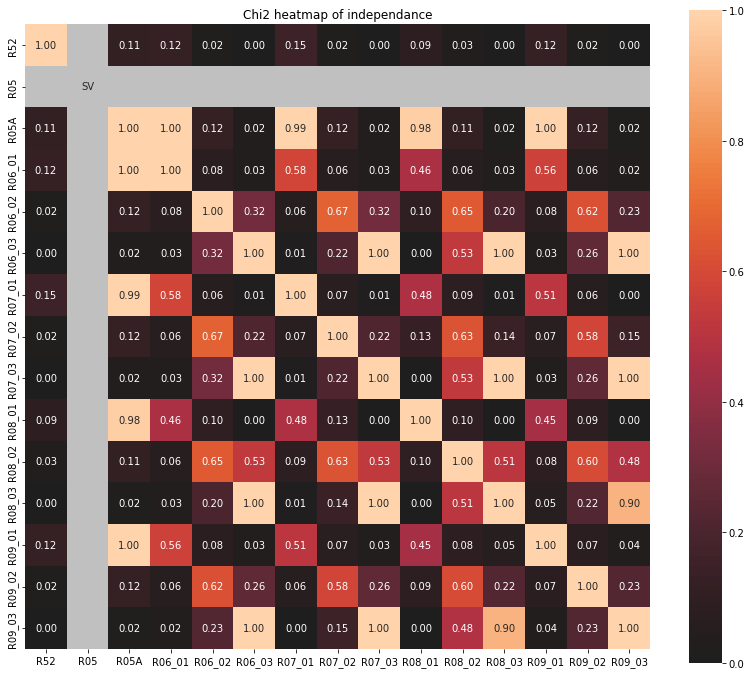

In [26]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 5
while i <= 9:
    aux = 'R0' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

        
analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _11_ a _12_

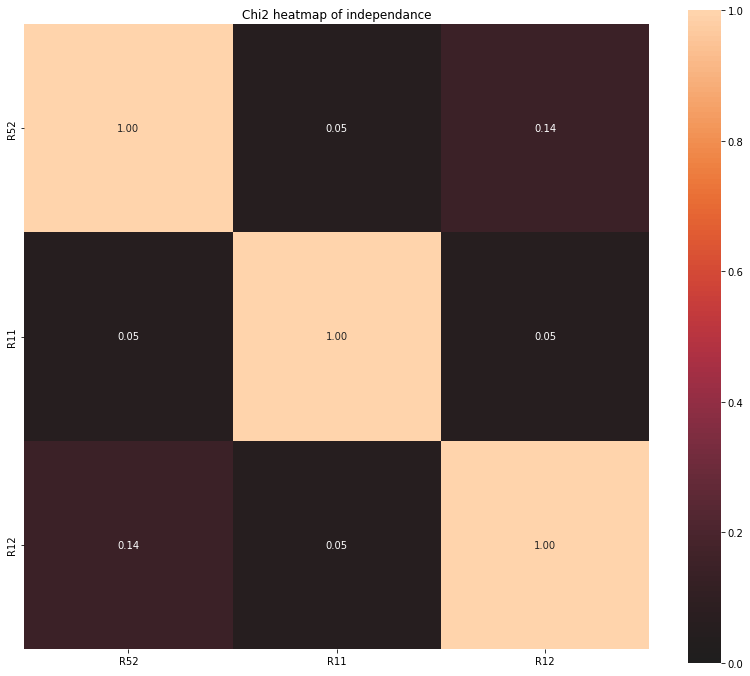

In [27]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 11
while i <= 12:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

        
analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _17_ a _18_

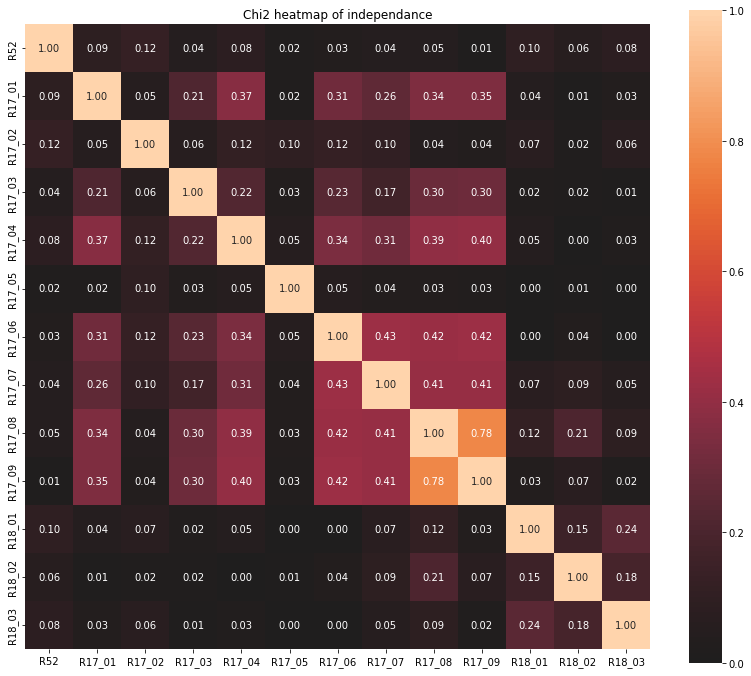

In [28]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 17
while i <= 18:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

        
analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _19_

In [ ]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 19
while i <= 19:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _21_ a _27_

In [ ]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 21
while i <= 27:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _28_ a _30_

In [ ]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 28
while i <= 30:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _31_ a _32_

In [ ]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 31
while i <= 32:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _33_ a _40_

In [ ]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 33
while i <= 40:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _41_ 

In [ ]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 41
while i <= 41:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _42_ a _44_

In [ ]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 42
while i <= 44:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _45_

In [ ]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 45
while i <= 45:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _46_ a _48_

In [ ]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 46
while i <= 48:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _49_

In [ ]:
# Pegando as colunas para selecionar pelo dicionário
bloco_buscado = []
aux = ''
i = 49
while i <= 49:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _50_ a _51_

In [ ]:
bloco_buscado = []
aux = ''
i = 50
while i <= 51:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _54_ a _59_

In [ ]:
bloco_buscado = []
aux = ''
i = 54
while i <= 59:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _60_ a _66_

In [ ]:
bloco_buscado = []
aux = ''
i = 60
while i <= 66:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _67_ a _68_

In [ ]:
bloco_buscado = []
aux = ''
i = 67
while i <= 68:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _69_ a _71_

In [ ]:
bloco_buscado = []
aux = ''
i = 69
while i <= 71:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _72_ a _73_

In [ ]:
bloco_buscado = []
aux = ''
i = 72
while i <= 73:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _74_ a _75_

In [ ]:
bloco_buscado = []
aux = ''
i = 74
while i <= 75:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _76_ a _78_

In [ ]:
bloco_buscado = []
aux = ''
i = 76
while i <= 78:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _79_ a _82_

In [ ]:
bloco_buscado = []
aux = ''
i = 79
while i <= 82:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _83_ a _86_

In [ ]:
bloco_buscado = []
aux = ''
i = 83
while i <= 86:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

In [ ]:
Colunas _87_ a _90_

In [ ]:
bloco_buscado = []
aux = ''
i = 87
while i <= 90:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

Colunas _91_ a _94_

In [ ]:
bloco_buscado = []
aux = ''
i = 91
while i <= 94:
    aux = 'R' + str(i)
    bloco_buscado.append(aux)
    i += 1

# Separando o bloco por loc
perguntas = ['R52']
for per in bloco_buscado:
    for column in col_per_quest[per]:
        perguntas.append(column)

analise = responsaveis_df.loc[:, perguntas]

# Teste do Chi Quadrado
associations(analise,figsize=(14,12),title="Chi2 heatmap of independance")
plt.show()

## 2. Aplicação das ferramentas estatísticas